Representacion de los datos
============================

En Python y con nuestro stack todos los datos que vamos a utilizar, se van a representar como un arreglo de Numpy o como una matriz disperza. 

In [1]:
# Importamos los datos con los que vamos a trabajar en este ejemplo. Estos ya vienen con la libreria scikit-learn;
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Vamos a ver las dimensiones de nuestros datos
print("dimensiones imagenes: %s" % str(digits.images.shape))
print("dimensiones clases: %s" % str(digits.target.shape))

dimensiones imagenes: (1797, 8, 8)
dimensiones clases: (1797,)


In [4]:
# Importamos la libreria de visualizacion MatplotLib
%matplotlib inline
import matplotlib.pyplot as plt

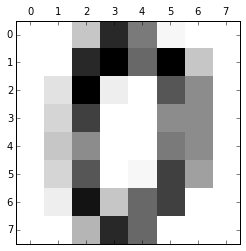

In [5]:
# visualizamos el primer elemento (Primer imagen del arreglo)
plt.matshow(digits.images[0], cmap=plt.cm.Greys);

In [6]:
# Ahora veamos todos las clases
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
print("Verificamos que la clase correspondiente a la imagen anterior es: %s" % str(digits.target[0]))

Verificamos que la clase correspondiente a la imagen anterior es: 0


Preparamos los datos
=====================

In [9]:
# Cambiamos la forma de nuestros datos a una matriz con 1797 filas y 64 columnas
X = digits.data.reshape(-1, 64)
print(X.shape)

(1797, 64)


In [10]:
# Verificamos las dimensiones de nuestro arreglo de clases;
y = digits.target
print(y.shape)

(1797,)


In [11]:
# Vemos como quedo nuestra matriz de datos
print(X)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


Analizando nuestros datos
==========================

Para esto vamos a reducir el numero de dimensiones de nuestros datos a 2 dimensiones y poder visualizarlos de forma sencilla

![optional caption text](imagenes/fig_pca_principal_component_analysis.png)

In [13]:
# Importamos la clase que implementa el algoritmo de PCA
from sklearn.decomposition import PCA

# Inicializamos el modelo con 2 dimensiones
pca = PCA(n_components=2)

In [14]:
# Ajustamos el modelo a los datos
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [15]:
# Luego transformamos los datos usando el modelo
X_pca = pca.transform(X)
# Miramos las nuevas dimensiones. Podemos ver que pasaron de 64 -> 2
X_pca.shape

(1797, 2)

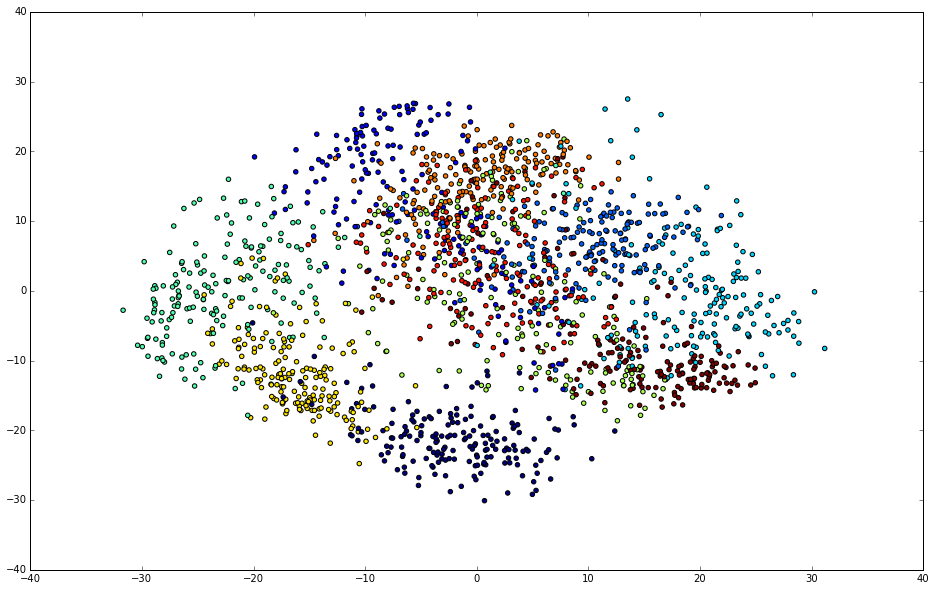

In [19]:
# Visualizamos los nuevos datos en 2d
plt.figure(figsize=(16, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

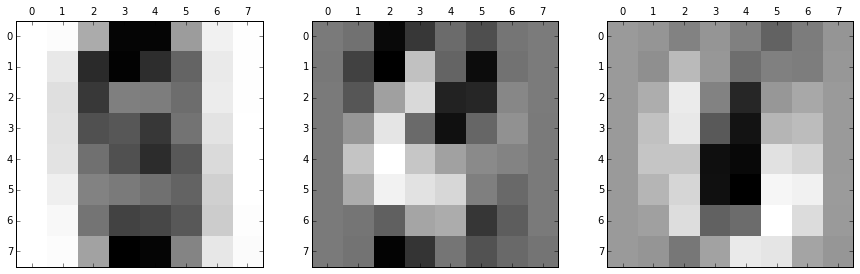

In [27]:
# Visualicemos ahora los datos (las formas) promedio
fix, ax = plt.subplots(1, 3)
fix.set_size_inches(15, 15)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys)

Clasificacion
===============
Para probar nuestro algoritmo, vamos a partir nuestros datos en 2 (Entrenamiento y prueba). En la vida real usariamos todos los datos para entrenamiento y los nuevos serian la prueba. 

In [28]:
# Importamos una funcion de scikit-learn que nos permite partir los datos de manera aleatoria 
# pero en un porcentaje especificado. 
# La semilla (random_state) la dejamos fija para que siempre haga la misma particion. 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# Observemos las dimensiones
print("Dimensiones X_train: %s" % repr(X_train.shape))
print("Dimensiones y_train: %s" % repr(y_train.shape))
print("Dimensiones X_test: %s" % repr(X_test.shape))
print("Dimensiones y_test: %s" % repr(y_test.shape))

Dimensiones X_train: (1347, 64)
Dimensiones y_train: (1347,)
Dimensiones X_test: (450, 64)
Dimensiones y_test: (450,)


Nuestro primer modelo de ML (SVM con kernel linear)
=====================================================

In [31]:
# Importamos el modelo de la libreria
from sklearn.svm import LinearSVC

In [32]:
# Creamos una instancia de la clase
svm = LinearSVC()

In [33]:
# Entrenamos el modelo usando los datos de entrenamiento
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
# Aplicamos el modelo sobre los datos de prueba
svm.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])

In [37]:
# Validamos las predicciones contra las etiquetas reales
preds = svm.score(X_test, y_test)
print("Precision: %s " % str(preds))

Precision: 0.928888888889 


Un modelo mas complejo (Random Forest)
========================================

In [38]:
# Importamos el modelo de la libreria
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Creamos una instancia de la clase
rf = RandomForestClassifier()

In [40]:
# Entrenamos el modelo usando los datos de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
# Validamos las predicciones contra las etiquetas reales
preds = rf.score(X_test, y_test)
print("Precision: %s " % str(preds))

Precision: 0.957777777778 


Usamos validacion cruzada
==========================
Con esto podemos validar la eficacia promedio del modelo y si este generaliza o no

![optional caption text](imagenes/cross_validation_diagram.png)


In [44]:
# Importamos la funcion desde scikit-learn
from sklearn.cross_validation import cross_val_score
# Importamos la libreria Numpy
import numpy as np

# Llamamos la funcion pasandole el modelo que creamos, los datos de entrenamiento y el numero de particiones. 
scores =  cross_val_score(rf, X_train, y_train, cv=5)

In [45]:
# Obtenemos el resultado de la validacion
print("Puntajes: %s " % (str(scores)))
print("La media: %f  La desviacion estandar: %f" % (np.mean(scores), np.std(scores)))

Puntajes: [ 0.94890511  0.94464945  0.91881919  0.95131086  0.9280303 ] 
La media: 0.938343  La desviacion estandar: 0.012705


Hiper-Parametros
===================
Cada algoritmo tiene unos parametros que debemos optimizar para obtener un mejor resultado

In [46]:
# Creamos otra instancia del clasificador, pero esta vez aumentamos el numero de arboles
rf2 = RandomForestClassifier(n_estimators=50)
scores =  cross_val_score(rf2, X_train, y_train, cv=5)

In [47]:
# Obtenemos el resultado de la validacion
print("Puntajes: %s " % (str(scores)))
print("La media: %f  La desviacion estandar: %f" % (np.mean(scores), np.std(scores)))

Puntajes: [ 0.97445255  0.98154982  0.97416974  0.96629213  0.97727273] 
La media: 0.974747  La desviacion estandar: 0.004991


Hiper-Parametros de forma automatica
======================================
Los mejores parametros para los modelos podemos obtenerlos de manera automatica y paralela de la siguiente manera:

In [48]:
# Importamos la clase para hacer busqueda de hiper-parametros por cuadrilla
from sklearn.grid_search import GridSearchCV

In [50]:
# Hagamos el ejercicio para el LinearSVC. Para este modelo el parametro 
# importante es  la contante C, asi que vamos a ingresar unos valores para esta. 
param_grid = {'C': 10. ** np.arange(-3, 4)}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=3)

In [51]:
# Ajustemos los datos al modelo
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.951327 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.966592 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.970852 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.951327 -   0.1s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.957684 -   0.1s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.959641 -   0.1s
[CV] C=0.1 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [53]:
# Imprimimos los resultados
print("El mejor parametro fue: %s " % (str(grid_search.best_params_)))
print("El puntaje para este parametro fue: %s " % (grid_search.best_score_))

El mejor parametro fue: {'C': 0.001} 
El puntaje para este parametro fue: 0.96288047513 


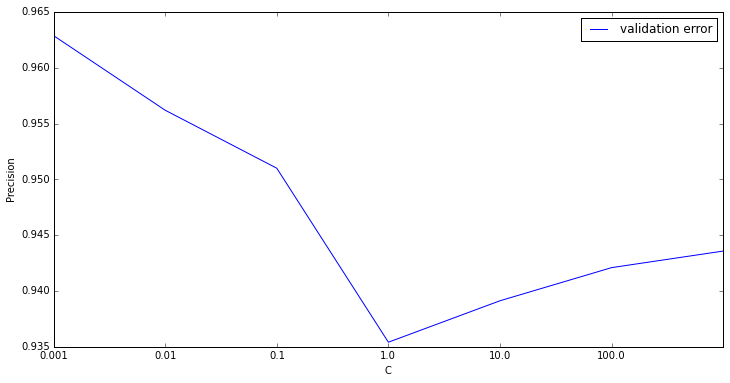

In [61]:
# Visualicemos los hiper-parametros vs la precision
plt.figure(figsize=(12, 6))
plt.plot([c.mean_validation_score for c in grid_search.grid_scores_], label="validation error")
plt.xticks(np.arange(6), param_grid['C'])
plt.xlabel("C")
plt.ylabel("Precision")
plt.legend(loc='best')

Podemos ver en la grafica anterior que el C = 0.001 fue el mejor parametro dada su mayor precision